In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
!pip install underthesea
from underthesea import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 61.8 MB/s eta 0:00:00


In [4]:
# Đọc dữ liệu từ file hoặc nguồn dữ liệu khác
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/NMXLNNTN/data/sentimentVN.csv'
df = pd.read_csv(filename)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df['content'].astype(str)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
print(X_train.shape)
print(y_train.shape)

Mounted at /content/drive
(23595,)
(23595,)


In [5]:
# Các biểu diễn và mô hình
representations = ['binary', 'count', 'freq', 'tfidf']
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [6]:
# Huấn luyện và đánh giá mô hình cho từng biểu diễn và mô hình
results = {}
for rep in representations:
    results[rep] = {}
    for clf_name, clf in classifiers.items():
        # Tạo vectorizer tương ứng
        if rep == 'tfidf':
            vectorizer = TfidfVectorizer(ngram_range=(1, 2))
        else:
            vectorizer = CountVectorizer(ngram_range=(1, 2), binary=(rep=='binary'), max_features=10000)
        # Biến đổi dữ liệu
        X_train_transformed = vectorizer.fit_transform(X_train)
        X_test_transformed = vectorizer.transform(X_test)
        # Huấn luyện mô hình
        clf.fit(X_train_transformed, y_train)
        # Đánh giá mô hình
        y_pred = clf.predict(X_test_transformed)
        accuracy = accuracy_score(y_test, y_pred)
        results[rep][clf_name] = accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [7]:
# Hiển thị kết quả
for rep, clf_accs in results.items():
    print(f"\nRepresentation: {rep}")
    for clf_name, acc in clf_accs.items():
        print(f"{clf_name}: {acc}")


Representation: binary
SVM: 0.7776223776223776
Logistic Regression: 0.7697393515575334
Decision Tree: 0.7207883026064844
kNN: 0.7169739351557534
Random Forest: 0.7655435473617291

Representation: count
SVM: 0.7776223776223776
Logistic Regression: 0.7674507310870947
Decision Tree: 0.7206611570247934
kNN: 0.7221869040050858
Random Forest: 0.7660521296884933

Representation: freq
SVM: 0.7776223776223776
Logistic Regression: 0.7674507310870947
Decision Tree: 0.7182453909726637
kNN: 0.7221869040050858
Random Forest: 0.7671964399237127

Representation: tfidf
SVM: 0.7783852511125239
Logistic Regression: 0.778893833439288
Decision Tree: 0.7196439923712651
kNN: 0.6792116973935156
Random Forest: 0.7697393515575334


In [8]:
# Tìm và hiển thị mô hình có độ chính xác cao nhất
best_rep, best_clf_name = max(results.items(), key=lambda x: max(x[1].values()))
best_accuracy = max(best_clf_name.values())
print(f"\nBest representation: {best_rep}")
print(f"Best classifier: {max(best_clf_name, key=best_clf_name.get)}")
print(f"Accuracy: {best_accuracy}")


Best representation: tfidf
Best classifier: Logistic Regression
Accuracy: 0.778893833439288


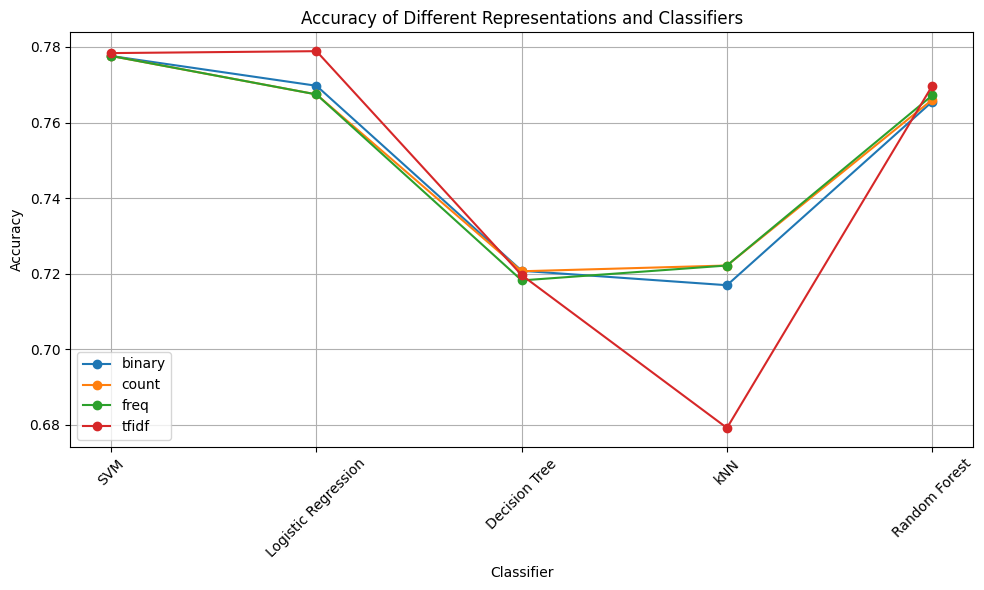

In [9]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for rep, clf_accs in results.items():
    plt.plot(list(clf_accs.keys()), list(clf_accs.values()), marker='o', label=rep)
plt.title('Accuracy of Different Representations and Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()